---ADMISSION: 101033

In [114]:
#scientific modules
import numpy as np
import pandas as pd 

#visualization module
import matplotlib.pyplot as plt 
import seaborn as sns

#nlp module
import nltk
import spacy

import re 
import string

#sklearn module (machine learning)
from sklearn.model_selection import train_test_split

#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [115]:
#read dataset 
#df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
df = pd.read_csv("train.csv")

df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


EDA on the dataset (Getting to understand the datset)

Data Facts

In [116]:
#Getting number of rows and column 
df.shape

(38932, 5)

In [117]:
#understand the columns we have
df.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [118]:
#get data type
df.dtypes

User_ID         object
Description     object
Browser_Used    object
Device_Used     object
Is_Response     object
dtype: object

In [119]:
#choose top 10 brands for review
for t in df['Is_Response'].unique():
    print(t)

not happy
happy


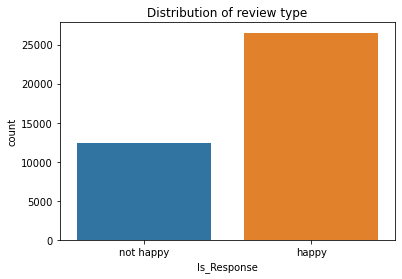

In [120]:
#get distribution of Is Response
sns.countplot(df['Is_Response'])
plt.title("Distribution of review type")
plt.show()

In [121]:
df['Is_Response'].value_counts(normalize=True)*100

happy        68.12134
not happy    31.87866
Name: Is_Response, dtype: float64

In [122]:
#statistical analysis of the dataset
df.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [123]:
#getting null values 
df.isna().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [124]:
#removing unecessary column
df.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

Data cleaning

In [125]:
def text_clean_1(text):
    text = text.lower()
    text = re.sub("\[.*?\]", '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [126]:
df['cleaned_description'] = pd.DataFrame(df.Description.apply(cleaned1))
df.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [127]:
def text_clean_2(text):
    text = re.sub('[''""-]', text)
    text = re.sub('[\n]', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [128]:
df['cleaned_description_new'] = pd.DataFrame(df.cleaned_description.apply(cleaned1))
df.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


WordCloud

In [129]:
for val in df['cleaned_description_new']:
    tokens = val.split()

    # Converts each token into lowercase
    text = "" 
    text += " ".join(tokens)+" "


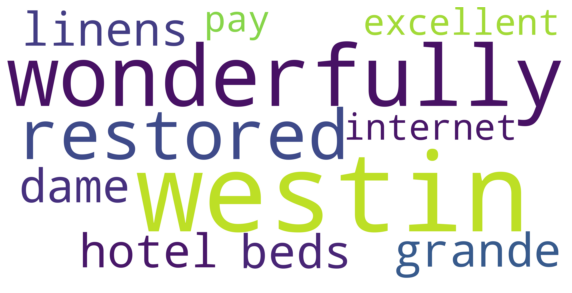

In [130]:
from wordcloud import WordCloud, STOPWORDS

#stopword object set 
stopwords = set(STOPWORDS)

#plot word cloud
word_cloud = WordCloud(width = 4000, height = 2000, background_color = "white", stopwords = stopwords).generate(text)
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Model building 

In [131]:
from sklearn.model_selection import train_test_split

#define y, x variable
X = df['cleaned_description_new']
y = df['Is_Response']

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state =  225)

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

#initializing objects of vectorizer and classifier
tvec = TfidfVectorizer()

#Logistic Regression
clf2 = LogisticRegression(solver="lbfgs")
#Random forest
rfm = RandomForestClassifier()
#Decision Tree
dtm = DecisionTreeClassifier()

In [133]:
model = Pipeline([
    ('vectorizer', tvec),
    ('classifier', clf2)
])

#train model
model.fit(X_train, y_train)

#get model performance
predictions = model.predict(X_test)
confusion_matrix(predictions, y_test)
print("\n")
#test accuracy
print(f'{round(model.score(X_test, y_test),2) * 100}% Accurate')



88.5% Accurate


In [134]:
model2 = Pipeline([
    ('vectorizer', tvec),
    ('classifier', rfm)
])

#train model
model2.fit(X_train, y_train)

#get model performance
predictions = model2.predict(X_test)
confusion_matrix(predictions, y_test)
print("\n")
#test accuracy
print(f'{round(model2.score(X_test, y_test),2) * 100}% Accurate')



80.0% Accurate


In [135]:
model3 = Pipeline([
    ('vectorizer', tvec),
    ('classifier', dtm)
])

#train model
model3.fit(X_train, y_train)

#get model performance
predictions = model3.predict(X_test)
confusion_matrix(predictions, y_test)
print("\n")
#test accuracy
print(f'{round(model3.score(X_test, y_test),2) * 100}% Accurate')



74.0% Accurate


In this case Logistic Regression is performing better unlike other model 

Testing model

In [136]:
example = ["I am happy"]
result = model.predict(example)
print(result)

['happy']
